## Business Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('studentmarksinfo.csv')
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [3]:
data.tail(11)

,study_hours,student_marks
189,7.26,79.87
190,5.79,73.14
191,5.22,70.51
192,8.71,84.03
193,7.55,79.64
194,6.35,74.24
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [4]:
data.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [5]:
data.shape

(200, 2)

In [6]:
data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


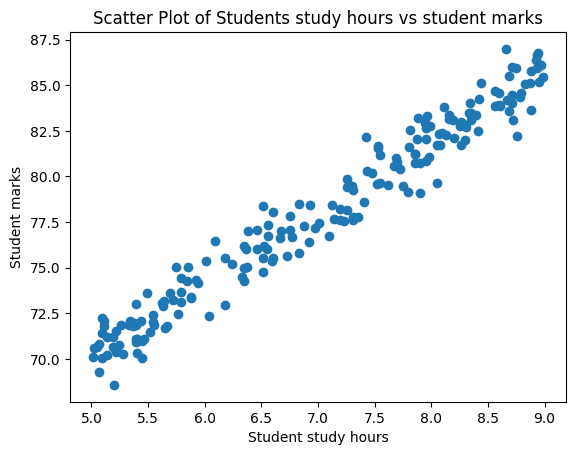

In [7]:
plt.scatter(x=data.study_hours,y=data.student_marks)
plt.xlabel("Student study hours")
plt.ylabel("Student marks")
plt.title("Scatter Plot of Students study hours vs student marks")
plt.show()

## DATA CLEANING

In [8]:
data.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [9]:
data.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [10]:
data1=data.fillna(data.mean())

In [11]:
data1.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

## SPLIT DATASETS

In [12]:
x=data1.drop("student_marks",axis='columns')
y=data1.drop("study_hours",axis='columns')
print('shape of x', x.shape)
print("shape of y",y.shape)

shape of x (200, 1)
shape of y (200, 1)


now i will do training and testing

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)
print("shape of x_train:-",x_train.shape)
print("shape of x_test:-",x_test.shape)
print("shape of y_train:-",y_train.shape)
print("shape of y_test:-",y_test.shape)



shape of x_train:- (160, 1)
shape of x_test:- (40, 1)
shape of y_train:- (160, 1)
shape of y_test:- (40, 1)


## Now i will choose  model and train it

## formula of linear regression is:----- y=m*x+c

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr=LinearRegression()

In [18]:
lr.fit(x_train,y_train)
lr.coef_


array([[3.93571802]])

In [20]:
lr.intercept_

array([50.44735504])

now we have got m=3.93, c=50.44
y=m*x+c that is y=3.93*4+50.44=66.16

In [21]:
lr.predict([[4]])

C:\ython311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[66.1902271]])

if we dont want to show written array and its brackets then we need to do it in this way

In [22]:
lr.predict([[4]])[0][0]

C:\ython311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19022710353573

In [23]:
lr.predict([[4]])[0][0].round(2)

C:\ython311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19

In [25]:
y_pred=lr.predict(x_test)
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['study_hours','student_marks_original','student_marks_predicted'])

,study_hours,student_marks_original,student_marks_predicted
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


## fine tune model

In [26]:
lr.score(x_test,y_test)

0.9514124242154464

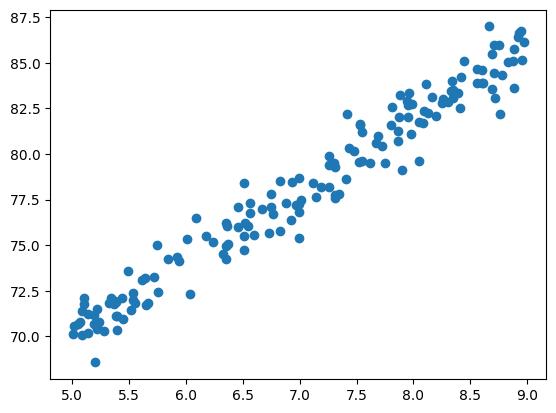

In [27]:
plt.scatter(x_train,y_train)

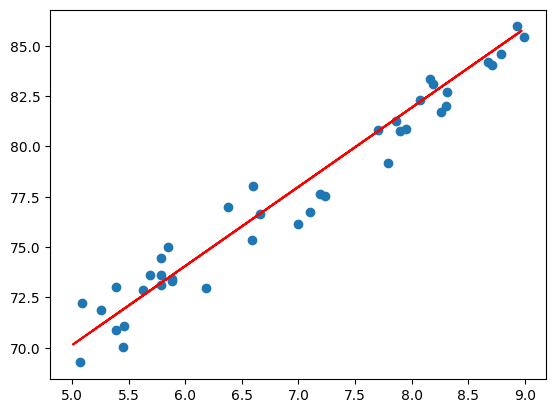

In [28]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color='r')

## presenting solution

## saveing model

In [29]:
import joblib
joblib.dump(lr,'students_mark_predictor_model.pkl')

['students_mark_predictor_model.pkl']